# WEEK 5a: Notes

- In this week, we start with tools that can be used to implement deep learning models

***
***
**Table Of Content:**
- [WEEK 5a: Notes](#WEEK-5a:-Notes)
- [Sentiment Analysis with Excel and Azure ML](#Sentiment-Analysis-with-Excel-and-Azure-ML)
- [Sentiment Analysis with Python and SpaCy](#Sentiment-Analysis-with-Python-and-SpaCy)
- [Geo-Spacial Analysis using Geopy, Folium, Pandas](#Geo-Spacial-Analysis-using-Geopy,-Folium,-Pandas)
***
***


# Sentiment Analysis with Excel and Azure ML

- We need to add the "Azure ML" add-on in our Microsoft Excel.
- It can be used to give sentiment analysis for text data.
- A little weird add-on because the header needs to be "tweet_text"
- Outputs 2 columns, for the text column:
    1. Sentiment
    1. Score

Following is a screenshot of the output:
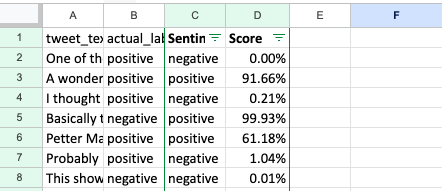

- Confusion Matrix:

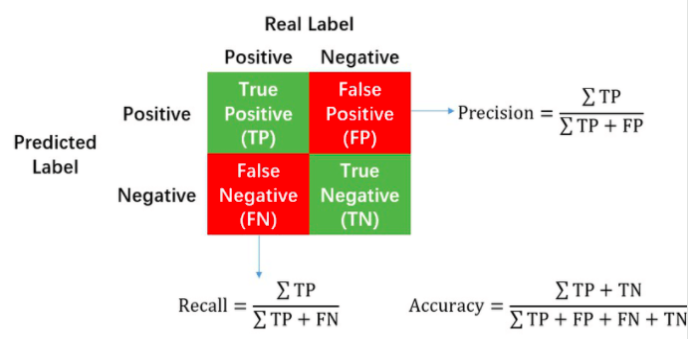

- Can create the confusion matrix using pivot table in Excel



# Sentiment Analysis with Python and SpaCy


- We can perform a similar sentiment analysis using Python as well
- The results can be a little different from the ones that we would get using Excel add-on
- We would use TextBlob, but can also use SpaCy which is an industrial-strength NLP API


In [3]:
import numpy as np
import pandas as pd

from textblob import TextBlob
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('https://drive.google.com/uc?id=1_nbSPqf4a3x2gH38syU75gFh5JXojY6B',nrows=1000)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


- Now that we have loaded the data, let's apply some lambda functions to each row to get the required data

In [5]:
data['TextBlob_Subjectivity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
data['TextBlob_Polarity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [6]:
data.head(3)

,review,sentiment,TextBlob_Subjectivity,TextBlob_Polarity
0,One of the other reviewers has mentioned that ...,positive,0.490369,0.023433
1,A wonderful little production. <br /><br />The...,positive,0.559343,0.109722
2,I thought this was a wonderful way to spend ti...,positive,0.658730,0.354008


- Now, we apply an if else logic, using a simple lambda function



In [8]:
data['TextBlob_Analysis'] = data['TextBlob_Polarity'].apply(
    lambda x: "negative" if x<0 else "positive"
)

In [9]:
data.head(3)

,review,sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,One of the other reviewers has mentioned that ...,positive,0.490369,0.023433,positive
1,A wonderful little production. <br /><br />The...,positive,0.559343,0.109722,positive
2,I thought this was a wonderful way to spend ti...,positive,0.658730,0.354008,positive


In [11]:
print(classification_report(
    data['sentiment'], 
    data['TextBlob_Analysis']))

              precision    recall  f1-score   support

    negative       0.88      0.46      0.60       499
    positive       0.64      0.94      0.76       501

    accuracy                           0.70      1000
   macro avg       0.76      0.70      0.68      1000
weighted avg       0.76      0.70      0.68      1000



- According to the classification report:
1. We have 2 confusion matrices merged, one for the negative and another for the positive

1. If we look at the row "negative":
    - PRECISION: Ratio of TP with all predicted positives
        - Here, It would mean ratio of true negatives with the total negative gives us a precision of 88% 
        - It means that how many were correctly identified(as negative) out of all the predicted "negatives"
        - Our model is correct around 88% of the time
    - RECALL: Out of actual positives, how many were correctly classified positive.
        - Ratio of TP with (TP+FN)
        - It means, out of all the actual "negatives", how many were correctly classified as "negative"
    
     

# Geo-Spacial Analysis using Geopy, Folium, Pandas

CODE: **[GOOGLE COLAB FILE](https://colab.research.google.com/drive/1TwKw2pQ9XKSdTUUsTq_ulw7rb-xVhays?usp=sharing#scrollTo=VLHX0uj4fcju)**

```python
m = folium.Map(location=NY_coord, zoom_start= 15)

folium.Marker(location=[lat,lng], 
              popup=store, 
              icon=folium.Icon(color=color)).add_to(m)

```
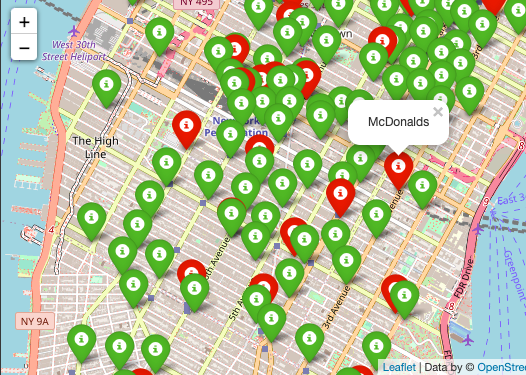